# Multivariate FTS 

# TAIEX Experiments

## Data loading

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from pyFTS.data import TAIEX as tx

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
df = tx.get_dataframe()
df = df.dropna()

train = df.iloc[2000:2500]
test = df.iloc[2500:3000]

## Variable, partitioning and model definitions

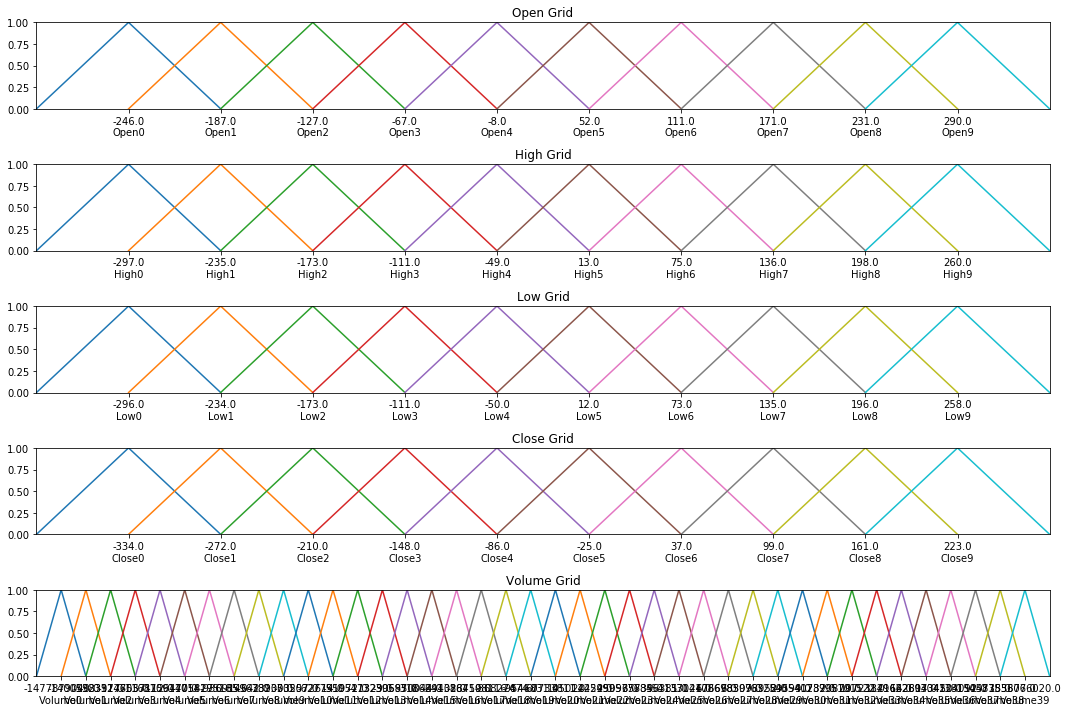

In [3]:
from pyFTS.partitioners import Grid, Util as pUtil
from pyFTS.common import Transformations
from pyFTS.models.multivariate import common, variable, mvfts

bc = Transformations.BoxCox(0)
diff = Transformations.Differential(1)

np = 10

model = mvfts.MVFTS("")

fig, axes = plt.subplots(nrows=5, ncols=1,figsize=[15,10])

vopen = variable.Variable("Open", data_label="Openly", partitioner=Grid.GridPartitioner, npart=np, data=train,
                        transformation=diff)
model.append_variable(vopen)
vopen.partitioner.plot(axes[0])
vhigh = variable.Variable("High", data_label="Highest", partitioner=Grid.GridPartitioner, npart=np, data=train,
                        transformation=diff)
model.append_variable(vhigh)
vhigh.partitioner.plot(axes[1])
vlow = variable.Variable("Low", data_label="Lowermost", partitioner=Grid.GridPartitioner, npart=np, data=train,
                        transformation=diff)
model.append_variable(vlow)
vlow.partitioner.plot(axes[2])
vclose = variable.Variable("Close", data_label="Close", partitioner=Grid.GridPartitioner, npart=np, data=train,
                        transformation=diff)
model.append_variable(vclose)
vclose.partitioner.plot(axes[3])
vvol = variable.Variable("Volume", data_label="Volume", partitioner=Grid.GridPartitioner, npart=40, data=train,
                        transformation=diff)#train)
model.append_variable(vvol)
vvol.partitioner.plot(axes[4])

model.target_variable = vvol

plt.tight_layout()


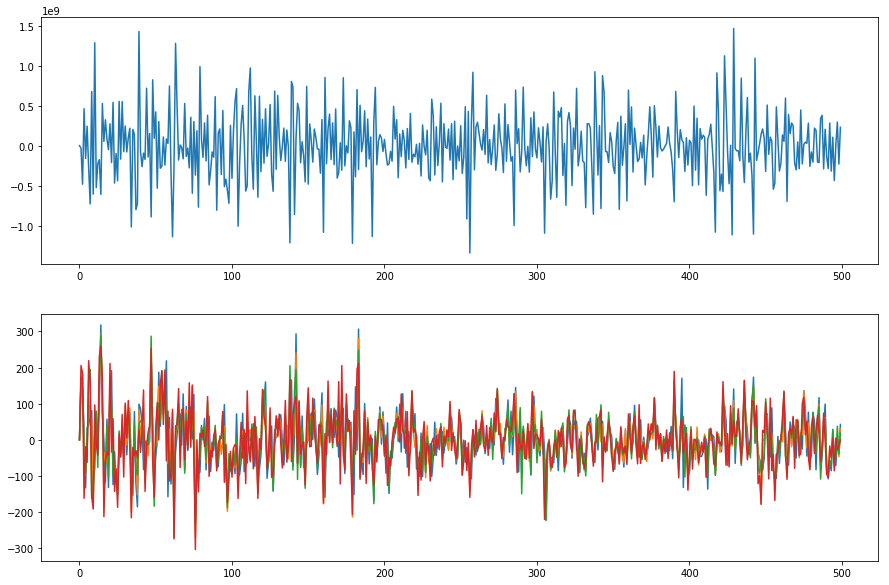

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=[15,10])
ax[0].plot(diff.apply(train["Volume"].values), label="Volume")

ax[1].plot(diff.apply(train["Openly"].values, label="Open"))
ax[1].plot(diff.apply(train["Highest"].values, label="Higher"))
ax[1].plot(diff.apply(train["Lowermost"].values, label="Lower"))
ax[1].plot(diff.apply(train["Close"].values, label="Close"))

plt.show()

## Model training and test

In [5]:
model.fit(train, num_batches=10, distributed=True, nodes=['192.168.0.110'], save=False)
forecasted = model.forecast(test, distributed=True, nodes=['192.168.0.110'])

2018-03-04 18:30:36 pycos - version 4.6.5 with epoll I/O notifier
2018-03-04 18:30:36 dispy - dispy client version: 4.8.4
2018-03-04 18:30:36 dispy - Storing fault recovery information in "_dispy_20180304183036"
2018-03-04 18:30:36 dispy - Started HTTP server at ('0.0.0.0', 8181)
[ 18:30:36] Distrituted Train Started
[ 18:30:36] Processing batch 1
[ 18:30:37] Finished batch 1
[ 18:30:37] Processing batch 2
[ 18:30:37] Finished batch 2
[ 18:30:37] Processing batch 3
[ 18:30:37] Finished batch 3
[ 18:30:37] Processing batch 4
[ 18:30:38] Finished batch 4
[ 18:30:38] Processing batch 5
[ 18:30:38] Finished batch 5
[ 18:30:38] Processing batch 6
[ 18:30:38] Finished batch 6
[ 18:30:38] Processing batch 7
[ 18:30:39] Finished batch 7
[ 18:30:39] Processing batch 8
[ 18:30:39] Finished batch 8
[ 18:30:39] Processing batch 9
[ 18:30:39] Finished batch 9
[ 18:30:39] Processing batch 10
[ 18:30:39] Finished batch 10
[ 18:30:39] Distrituted Train Finished

                           Node |  CPUs

/usr/local/lib/python3.6/dist-packages/pyFTS/models/multivariate/mvfts.py:119: RuntimeWarning: invalid value encountered in double_scalars
  ret.append(np.dot(mv,mp.T)/np.sum(mv))


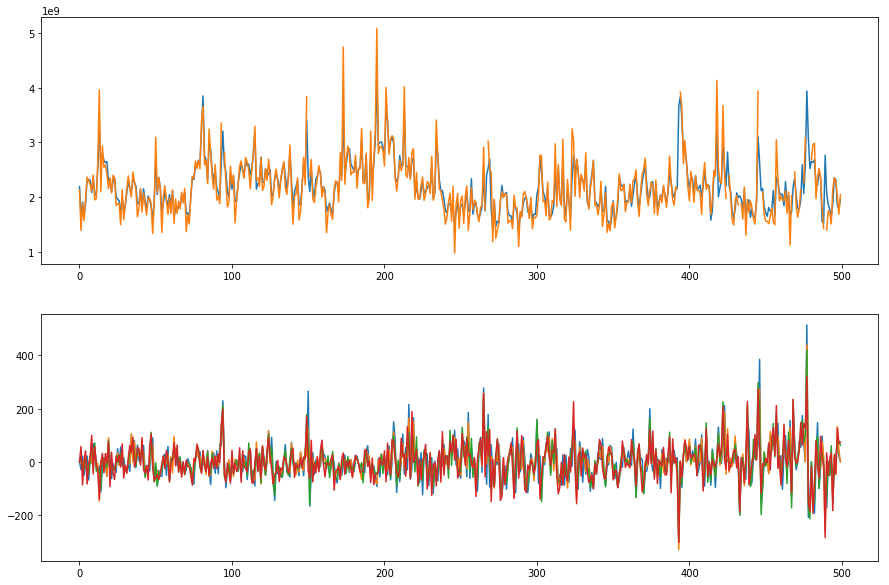

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=[15,10])
ax[0].plot(test["Volume"].values, label="Volume")

ax[1].plot(diff.apply(test["Openly"].values, label="Open"))
ax[1].plot(diff.apply(test["Highest"].values, label="Higher"))
ax[1].plot(diff.apply(test["Lowermost"].values, label="Lower"))
ax[1].plot(diff.apply(test["Close"].values, label="Close"))

ax[0].plot(forecasted)

plt.show()

# SONDA Experiments

## Data loading

In [1]:
import pandas as pd
import matplotlib.pylab as plt

%pylab inline

from pyFTS.data import SONDA
df = SONDA.get_dataframe()
train = df.iloc[0:1578241] #three years
test = df.iloc[1578241:] #ears
del df

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Variable, partitioning and model definitions

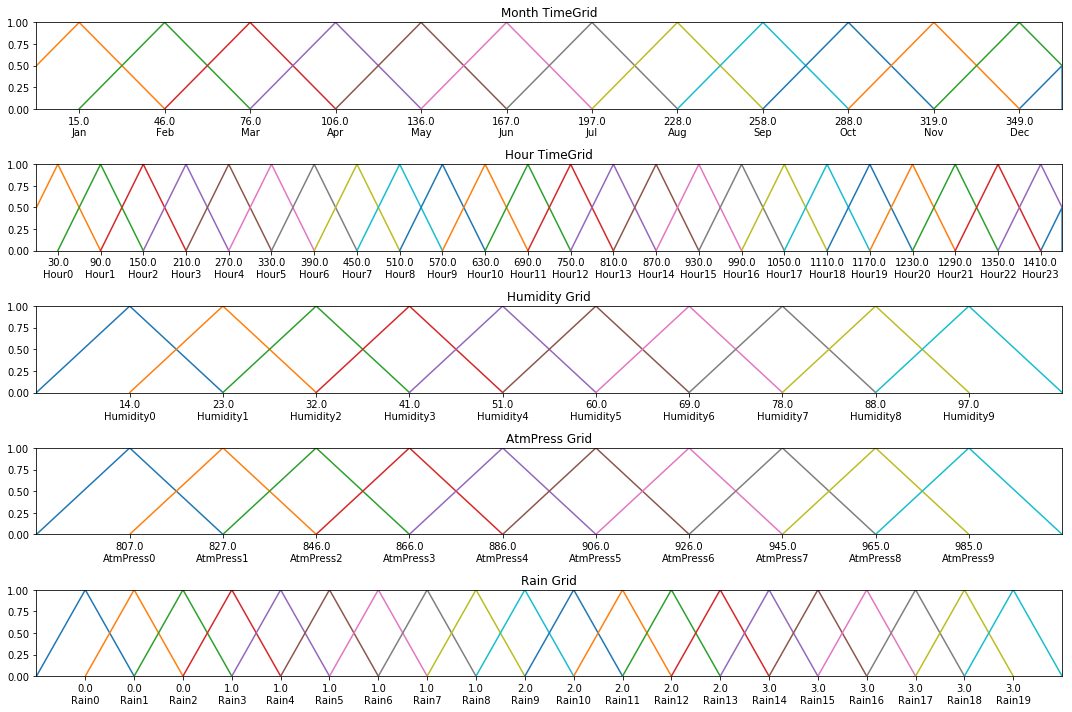

In [2]:
from pyFTS.partitioners import Grid, Util as pUtil
from pyFTS.common import Transformations
from pyFTS.models.multivariate import common, variable, mvfts
from pyFTS.models.seasonal import partitioner as seasonal
from pyFTS.models.seasonal.common import DateTime

bc = Transformations.BoxCox(0)
diff = Transformations.Differential(1)

np = 10

model = mvfts.MVFTS("")

fig, axes = plt.subplots(nrows=5, ncols=1,figsize=[15,10])

sp = {'seasonality': DateTime.day_of_year , 'names': ['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug','Sep','Oct','Nov','Dec']}

vmonth = variable.Variable("Month", data_label="datahora", partitioner=seasonal.TimeGridPartitioner, npart=12, 
                           data=train, partitioner_specific=sp)
model.append_variable(vmonth)
vmonth.partitioner.plot(axes[0])

sp = {'seasonality': DateTime.minute_of_day}

vhour = variable.Variable("Hour", data_label="datahora", partitioner=seasonal.TimeGridPartitioner, npart=24, 
                          data=train, partitioner_specific=sp)
model.append_variable(vhour)
vhour.partitioner.plot(axes[1])

vhumid = variable.Variable("Humidity", data_label="humid", partitioner=Grid.GridPartitioner, npart=np, data=train)
model.append_variable(vhumid)
vhumid.partitioner.plot(axes[2])

vpress = variable.Variable("AtmPress", data_label="press", partitioner=Grid.GridPartitioner, npart=np, data=train)
model.append_variable(vpress)
vpress.partitioner.plot(axes[3])

vrain = variable.Variable("Rain", data_label="rain", partitioner=Grid.GridPartitioner, npart=20, data=train)#train)
model.append_variable(vrain)
vrain.partitioner.plot(axes[4])

model.target_variable = vrain

plt.tight_layout()


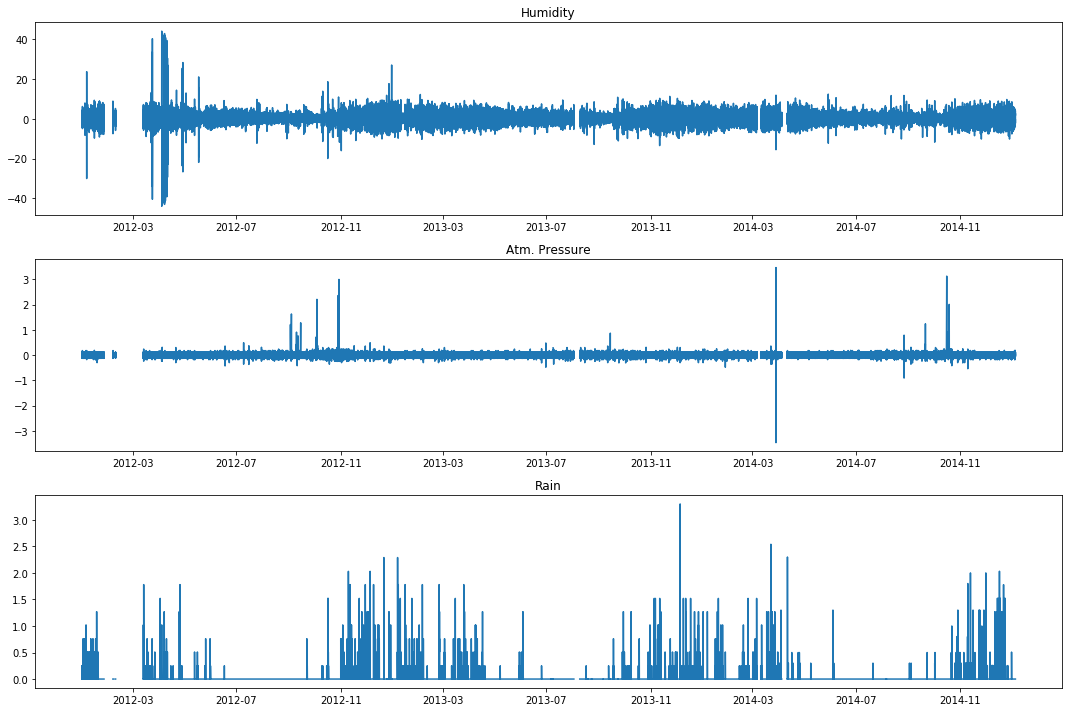

In [8]:
from pyFTS.common import Transformations
diff = Transformations.Differential(1)

fig, ax = plt.subplots(nrows=3, ncols=1,figsize=[15,10])

x = train["datahora"].values

ax[0].set_title("Humidity")
ax[0].plot(x, diff.apply(train["humid"].values))

ax[1].set_title("Atm. Pressure")
ax[1].plot(x, diff.apply(train["press"].values))

ax[2].set_title("Rain")
ax[2].plot(x, train["rain"].values)

plt.tight_layout()
plt.show()

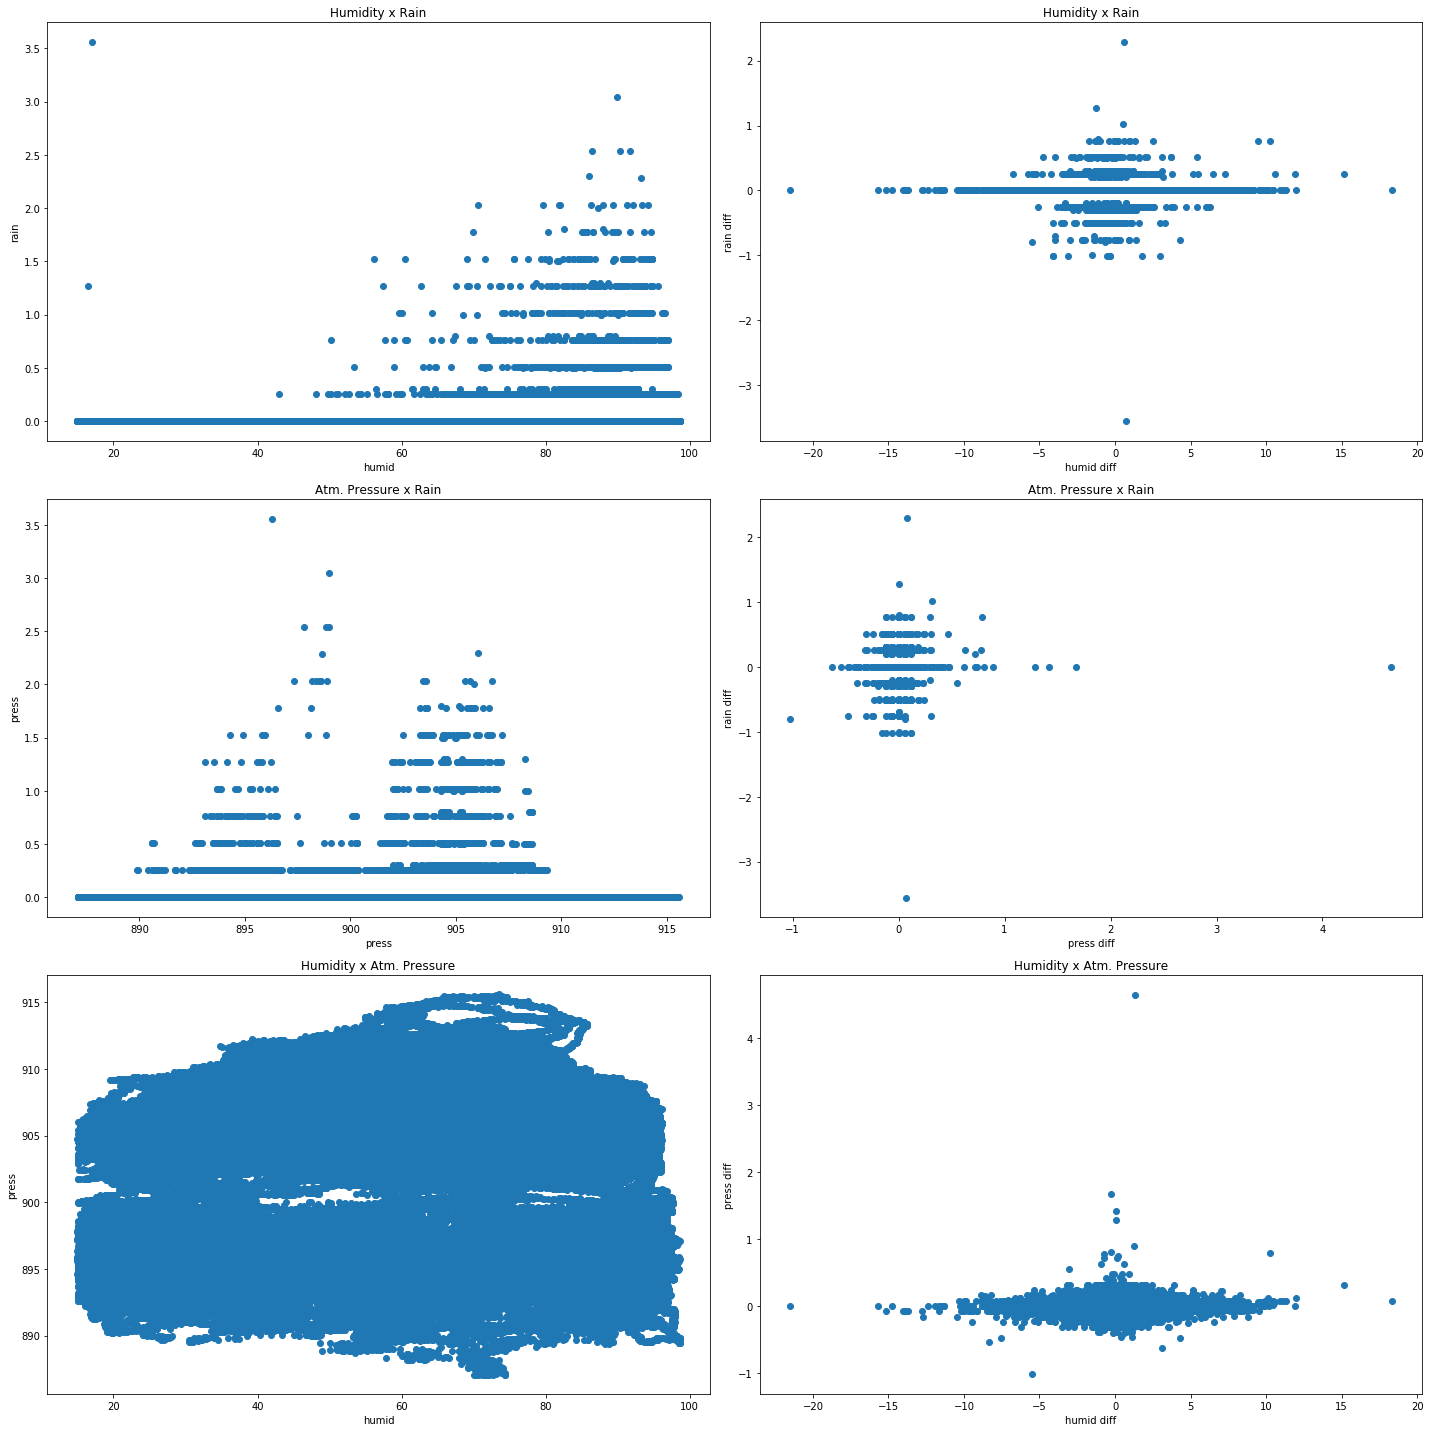

In [4]:
def comparevars(ax, x,y, x_lab, y_lab, title):
    ax.scatter(x,y)
    ax.set_title(title)
    ax.set_xlabel(x_lab)
    ax.set_ylabel(y_lab)
    
from pyFTS.common import Transformations
diff = Transformations.Differential(1)

data = test

rain_diff = diff.apply(data["rain"].values)
humid_diff = diff.apply(data["humid"].values)
press_diff = diff.apply(data["press"].values)
    
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=[20,20])

comparevars(ax[0][0],data["humid"].values,data["rain"].values,"humid","rain","Humidity x Rain")
comparevars(ax[0][1],humid_diff,rain_diff,"humid diff","rain diff","Humidity x Rain")
comparevars(ax[1][0],data["press"].values,data["rain"].values,"press","press","Atm. Pressure x Rain")
comparevars(ax[1][1],press_diff,rain_diff,"press diff","rain diff","Atm. Pressure x Rain")
comparevars(ax[2][0],data["humid"].values,data["press"].values,"humid","press","Humidity x Atm. Pressure")
comparevars(ax[2][1],humid_diff, press_diff,"humid diff","press diff","Humidity x Atm. Pressure")

plt.tight_layout()
plt.show()


## Model training and test

This model take time (a couple of hours) to be learned, so it is advisable to run it in distributed mode. The distributed mode use the dispy tool.

- Install dispy on all computer nodes:
```python
$sudo pip3 install dispy
```

- Run the dispynode on all computer nodes:
```python
$sudo python3 /usr/local/lib/python3.6/dist-packages/dispy/dispynode.py -i [MACHINE IP]
```

The *save* parameter save the fitted model on disk on *file_path* file.

In [5]:
model.fit(train, num_batches=200, save=True, batch_save=True, file_path='mvfts_sonda', 
          distributed=True, nodes=['192.168.0.110','192.168.0.106'], 
          batch_save_interval=10)

In [2]:
from pyFTS.common import Util

model = Util.load_obj('mvfts_sonda')

For one-year data the prediction task also takes time. Same approach of the training method is used here.

In [3]:
from datetime import datetime
data = test 
_range = data['datahora'].values
print(datetime.now())
forecasted = model.predict(data, num_batches=20, distributed=True, nodes=['192.168.1.22'])
print(datetime.now())

2018-03-06 12:07:39.412804
2018-03-06 12:07:39 pycos - version 4.6.5 with epoll I/O notifier
2018-03-06 12:07:39 dispy - dispy client version: 4.8.4
2018-03-06 12:07:39 dispy - Storing fault recovery information in "_dispy_20180306120739"
2018-03-06 12:07:39 dispy - Started HTTP server at ('0.0.0.0', 8181)

                           Node |  CPUs |    Jobs |    Sec/Job | Node Time Sec
------------------------------------------------------------------------------
 192.168.1.22 (petronio-noteboo |     3 |      20 |      0.741 |        14.815

Total job time: 14.815 sec, wall time: 5.951 sec, speedup: 2.489

2018-03-06 12:07:45 dispy - HTTP server waiting for 10 seconds for client updates before quitting
2018-03-06 12:07:56.086223


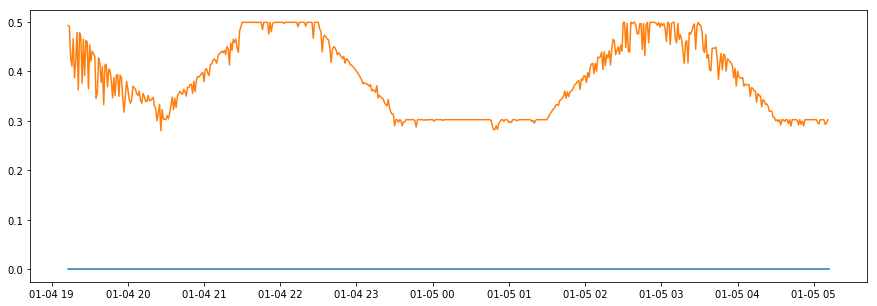

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
plot(_range,data['rain'].values)
plot(_range[:-1],forecasted)